# Статистический метод количественной оценки понятности иностранных славянских языков для русскоязычных носителей
### Клышинский Эдуард
#### Материалы к статье

<a href="Понятность славянских языков - русский.pdf">Текст статьи</a>

<a name="review"></a>
### Обзор работ в области взаимной понятности языков

Под понятностью языка A для носителя языка B будем понимать средний процент правильных ответов, которые дали носители языка B при прохождении теста на языке A.

Понятность между двумя языками не является симметричной, то есть то, что ясно для носителей языка A в языке B, может быть не понятно для носителей языка B в языке A. 

Среди работ в данной области следует особо выделить большой проект [MICReLa](https://www.let.rug.nl/gooskens/project/?p=publications), посвященный анализу понятности основных мировых языков. Например, в статье [Mutual intelligibility between West and South Slavic languages](https://link.springer.com/article/10.1007%2Fs11185-015-9150-9) авторы показывают степень понятности западных и южных славянских языков. 

Для определения понятности языков используют различные методики:
- прослушивание и пересказ;
- перевод текста;
- перевод отдельных слов;
- выбор одного из вариантов перевода;
- тест с пропущенными словами;
- выбор иностранной фразы, наиболее полно описывающей изображение;
- опрос понятности языка по суъективным ощущениям.

<a name="method"></a>
### Метод определения взаимной понятности

В данной работе мы анализировали понятность текста на иностранном славянском языке при помощи теста с пропущенными словами.

Опрашиваемому предъявлялся параллельный текст на родном и иностранном славянском языках. Для языков, записываемых кириллицей, давалась транслитерация на латиницу. Для языков, записываемых латиницей, давалась транслитерация на кириллицу. В тексте на родном языке были пропущены некоторые слова, которые опрашиваемый должен был заполнить. Пропускались слова значимых частей речи: существительное, прилагательное и глагол. Расстояние между пропущенными словами  строго не выдерживалось. 

Для оценки корректности ответов использовались следующие градации.<br>
Ответ считается *корректным*, если указано слово из художественного текста, его синоним или другое слово, передающее смысл пропущенного.<br>
Ответ считается *частично корректным*, если указано слово с тем же смыслом, но с измененной частью речи, или указано слово той же части речи, подходящее по тексту, но изменяющее смысл.<br>
Ответ *некорректен*, если не угадана часть речи, дана калька из параллельного текста, написана глупость или слово пропущено.<br>
В дальнейшем за корректный ответ давалось одно очко, за частично корректный ответ - 0,5, и за некорректный - 0 очков.

Для контроля использовался текст только на родном языке, без параллельного иностранного текста, оцениваемый по тем же критериям. Таким образом, в нашем случае понятность иностранного текста определяется как превышение средней понятности текста (средней суммы баллов ответов пользователей) над контрольным значением.

В ходе проверки отсеивались пользователи с менее чем 6 ответами или одним-двумя отличиями от исходного текста на родном языке. Сделаны некоторые исключения для случая украинский родной и русский параллельный тексты, так как русский язык известен подавляющему большинству населения Украины.

Проверку проводил один эксперт для каждого родного языка. Эксперт являлся носителем данного языка.

<a name="tools"></a>
### Программный инструментарий

Тесты были размещены на сайте ([русская версия теста](http://cosyco.ru/under/rus.html), большая просьба не отправлять результаты, так как Вам по ходу чтения станут известны ответы). Также на сайте располагался интерейс проверяющих, который включал в себя интерфейс проверки и интерфейс контроля результатов (рисунки приведены ниже).

![Интерфейс проверки ответов](img/interface1.png)
<center>Интерфейс проверки ответов</center>

![Интерфейс контроля результатов](img/interface2.png)
<center>Интерфейс контроля результатов</center>


<a name="results"></a>
### Полученные результаты

Для просмотра результатов исследования вам необходимо выполнить код, который идет ниже.


In [1]:
# Загрузка библиотек.
import numpy as np
import pandas as pd
from math import sqrt
from scipy.stats import pearsonr

import matplotlib as pl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.text import Text as plText
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
import seaborn as sns
import matplotlib.transforms as transforms

from ipywidgets import interact, interactive_output, Select, HBox, FloatSlider
from IPython.display import display

import copy

# Own imports
from intelligibility_figures import *

### Загрузка полученных данных.

Для всех файлов первой колонкой является номер строки.

- **user_data.csv** - данные об информантах, принявших участие в опросе. Поля:
    - *id_user* - уникальный идентификатор каждого информанта;
    - *test_id* - номер теста, в котором принимал участие информант;
    - *parallel_lang* - на каком параллельном языке предъявлялся тест данному пользователю. *No Parallel Text* означает, что информант участвовал в контрольной группе, то есть восстанавливал слова без параллельного текста.
    - *age* - возрастная группа информанта. sch означает школьника, bak - студента бакалавриата, mag - студента магистратуры, fin - закончил обучение.
    - *speciality* - имеет ли образование информанта отношение к языковым специальностям (перевод, лингвистика, филология): yes - имеет, no - не имеет (или не было отмечено).
    - *known_langs* - какими иностранными славянскими языками владеет. Список из пяти и более языков означает, что информант отказался от прохождения параллельного теста и принимал участие в контрольной группе.
    - *ans_cnt* - количество непустых ответов, которые дал информант.
    
    
- *user_answers.csv* - ответы информантов в тестах. Поля:
    - *id_user* - уникальный идентификатор информанта. Значение должно присутствовать в таблице user_data.
    - *test_id* - номер теста, в котором принимал участие информант;
    - *parallel_lang* - на каком параллельном языке предъявлялся тест данному пользователю. Значение должно совпадать с таблицей user_data.
    - *answer_no* - номер пропуска в тесте, для которого восстановлено слово.
    - *answer* - текст ответа информанта;
    - *correctness* - оценка ответа асессором. incorr означает некорректный ответ, pcorr - частично корректный, corr - корректный.
    
    
- *texts.csv* - Текстовые фрагменты, использовавшиеся при тестировании. Слова, выделенные символом подчеркивания _ означают те слова, которые пропускались в тесте и их соответствия в параллельном тексте. Все тексты разбиты на предложения, предложения в разных языках выровнены, то есть разные переводы предложений имеют один и тот же номер. Поля:
    - *id_set* - номер теста.
    - *lang_name* - название языка, на котором написан текст.
    - *sent_pos* - номер предложения в тексте.
    - *sent* - текст предложения.

Загрузим исходные данные в pd.DataFrame для дальнейшего анализа.

In [2]:
# Загружаем пользователььские данные.
user_data = pd.read_csv("data/user_data.csv", index_col=0)
users_answers = pd.read_csv("data/user_answers.csv", index_col=0)

In [3]:
text_frame = pd.read_csv("data/texts.csv", index_col=0)
text_frame['id_set']=text_frame['id_set'].astype("str")

In [4]:
# Добавляем количественные оценки корректности ответов.
users_answers["marks"] = users_answers["correctness"]
users_answers["marks"] = users_answers["marks"].replace({"corr":1, "pcorr":0.5, "incorr":0})

In [5]:
# рассчитываем среднюю корректность ответов по пользователям, добавляем ее к пользователям.
mean_marks = users_answers.groupby("id_user").mean()["marks"]
mean_marks.name = "mean_mark"
user_data = user_data.join(mean_marks, on="id_user")

In [6]:
# Считаем количество информантов, прошедших тест по тестам и параллельным языкам.
part_no = pd.DataFrame(columns=["test_id","parallel_lang", "count"])
req = user_data.groupby(["test_id", "parallel_lang"]).count()
part_no["count"] = req["id_user"]
part_no["test_id"] = req.index.get_level_values("test_id")
part_no["parallel_lang"] = req.index.get_level_values("parallel_lang")
part_no.index = range(part_no.shape[0])

In [7]:
# Рассчитываем по всем пользователям среднюю понятность слова в данной позиции теста
# при фиксированном тесте и параллельном языке.
qu_data = pd.DataFrame()
req = users_answers[["test_id", "parallel_lang", "answer_no", "marks"]].groupby(["test_id", "parallel_lang", "answer_no"]).mean()
qu_data["mean_mark"] = req["marks"]
qu_data["test_id"] = req.index.get_level_values("test_id")
qu_data["parallel_lang"] = req.index.get_level_values("parallel_lang")
qu_data["answer_no"] = req.index.get_level_values("answer_no")
qu_data.index = range(qu_data.shape[0])

Для проверки посмотрим на распределение числа не пустых ответов по информантам. Видно, что большинство информантов старалось дать как можно больше ответов.

In [8]:
def drawCompletenessStub(test_id):
    drawCompleteness(test_id, users_answers)
    
esel = Select(options=[1, 2, 3, 4, 5, 6], value=1, description='Test: ')
out = interactive_output(drawCompletenessStub, {'test_id': esel})
ui = HBox([out, esel])
display(ui)    

В качестве материала для тестов использовались следующие фрагменты.

(1) <b>М.А. Булгаков “Мастер и Маргарита”</b>, сцена казни Иешуа - 42 пропущенных слова из 390, 16 предложений.<br>
(2) Сцена диагностики Бездомного в сумасшедшем доме - 39 пропущенных слов из 396, 23 предложения.<br>
(6) Беседа с Воландом на Патриарших Прудах после описания сцены казни - 35 пропущенных слов из 337, 16 предложений.

(3) <b>Г. Сенкевич “Камо грядеши”</b>, сцена поездки Марка Виниция в горящий Рим - 35 пропущенных слов из 278, 20 предложений.<br>
(4) Размышления Виниция о сбежавшей Лигии - 44 пропущенных слова из 408, 20 предложений.<br>
(5) Виниций думает о похищении Лигии - 37 пропущенных слов из 380, 23 предложения<br>

“Мастер и Маргарита” - русский оригинал и художественные переводы на польский, чешский, словацкий, украинский, белорусский, сербский, болгарский, словенский (кроме теста 6).  
“Камо грядеши” - польский оригинал и художественные переводы на русский, белорусский, украинский, чешский, польский, сербский, болгарский, словенский.
Для всех языков пропускались одни и те же слова.

Здесь вы можете посмотреть тексты, которые использовались для тестов. Слова, выделенные знаками подчеркивания, означают, что они должны быть пропущены, если данный текст является родным для опрашиваемого. При предъявлении текста в качестве параллельного, знаки подчеркивания опускались.

In [9]:
def show_test(lang, test_no):
    display([t[1].sent for t in text_frame[(text_frame.lang_name==lang) & (text_frame.id_set==test_no)].iterrows()])

lsel = Select(options=['Russian', 'Ukranian', 'Belorussian', 'Bulgarian', 'Serbian', 'Polish', 'Czech', 'Slovak', 'Slovene'], value='Russian', description='Language: ')
esel = Select(options=['1', '2', '3', '4', '5', '6'], value='1', description='Test: ')
ui = HBox([lsel, esel])
out = interactive_output(show_test, {'lang': lsel, 'test_no': esel})
display(ui, out)

Output()

**Участники эксперимента** 

Студенты из Москвы, Санкт-Петербурга, и Владивостока, школьники из Москвы, взрослые участники из разных городов, участники с Толоки (более 50%).

Ниже вы можете посмотреть количество участников по языкам и тестам. 

In [10]:
# Drawing data on the number of partisipants.
display(part_no.sort_values(["parallel_lang", "test_id"]))

,test_id,parallel_lang,count
0,1,Belorussian,38
9,2,Belorussian,38
18,3,Belorussian,37
27,4,Belorussian,82
36,5,Belorussian,48
45,6,Belorussian,37
1,1,Bulgarian,37
10,2,Bulgarian,37
19,3,Bulgarian,37
28,4,Bulgarian,37


Также участники вводили информацию о своем образовании и других иностранных славянских языках, которые они знают.
Знакомые языки испытуемым не предлагались. 


Посмотрим теперь на результаты прохождения тестов в зависимости от родного языка участника.

Каждая точка на графике означает среднюю оценку точности ответов одного участника. По оси X записаны языки параллельных текстов, контрольная группа обозначена как "Контроль". Цветные вертикальные полосы означают нижнюю и верхнюю границу 95% доверительного интервала для среднего по ответам пользователей, крест обозначает среднее значение. Серая полоса означает доверительный интервал для контрольного теста.

В таблице строка *count* означает количество полученных ответов, *mean* - среднее значение по ответам участников, *ci_min* и *ci_max* - нижнюю и верхнюю границу 95% доверительного интервала для среднего по ответам пользователей.

<IPython.core.display.Javascript object>


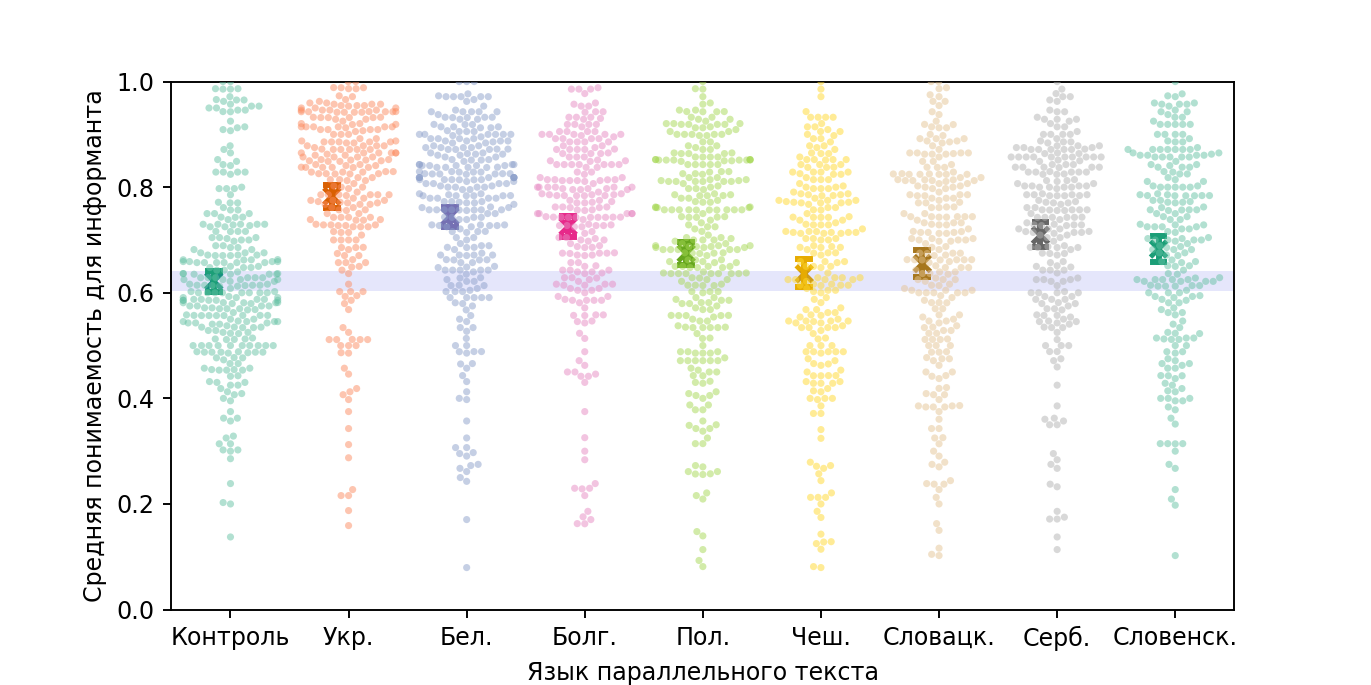

Select(description='Test: ', index=6, options=('1', '2', '3', '4', '5', '6', 'All'), value='All')

Output()

In [11]:
def showLangsStub(test):
    show_langs(test, user_data, axes)

%matplotlib notebook

fig, axes = plt.subplots(1, 1, figsize=(8,4), num=1)

#lsel = Select(options=['Russian', 'Ukranian', 'Serbian'], value='Russian', description='Language: ')
esel = Select(options=['1', '2', '3', '4', '5', '6', 'All'], value='All', description='Test: ')
#ui = HBox([lsel,esel])
out = interactive_output(showLangsStub, {'test': esel})
#out.layout.height = '200px'
display(esel, out)
fig.savefig('img_res/Fig_1_general_distribution_users.png', dpi = 600)

На рисунке ниже можно увидеть распределение среднего и доверительных интервалов по языкам в зависимости от теста. Ниже те же данные сгруппированы по языкам. Для каждой пары "тест-язык" даны среднее значение и доверительный интервал.

<IPython.core.display.Javascript object>


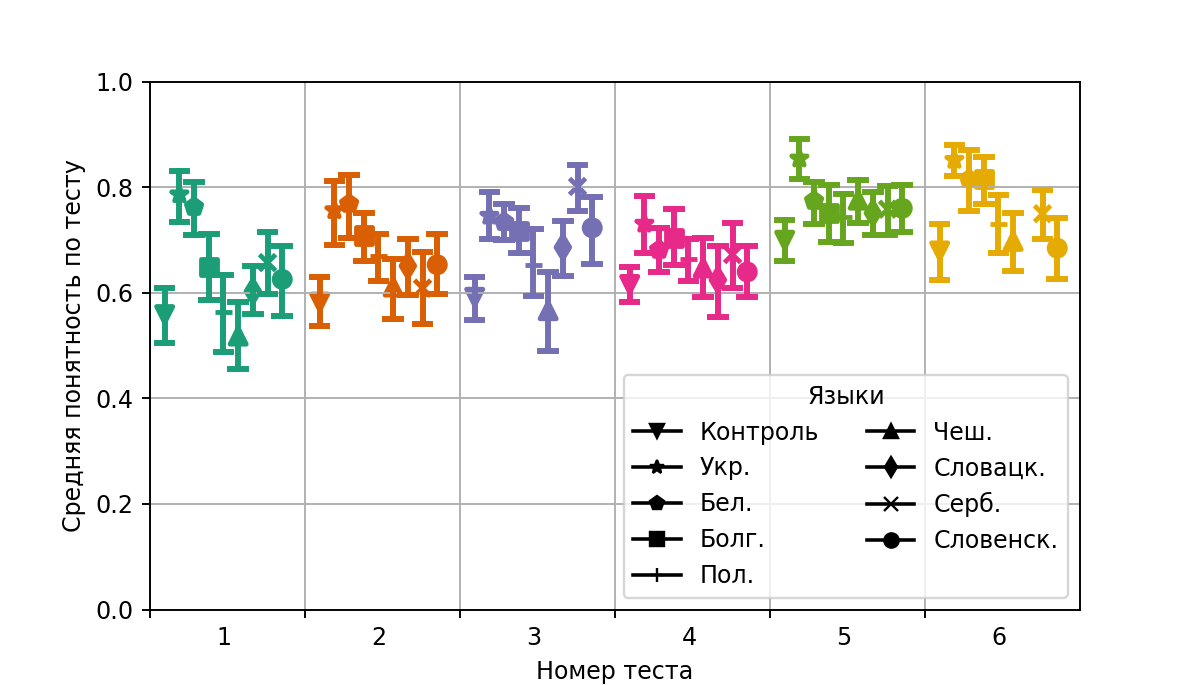

In [12]:
show_langs_by_tests(user_data, axes)

<IPython.core.display.Javascript object>


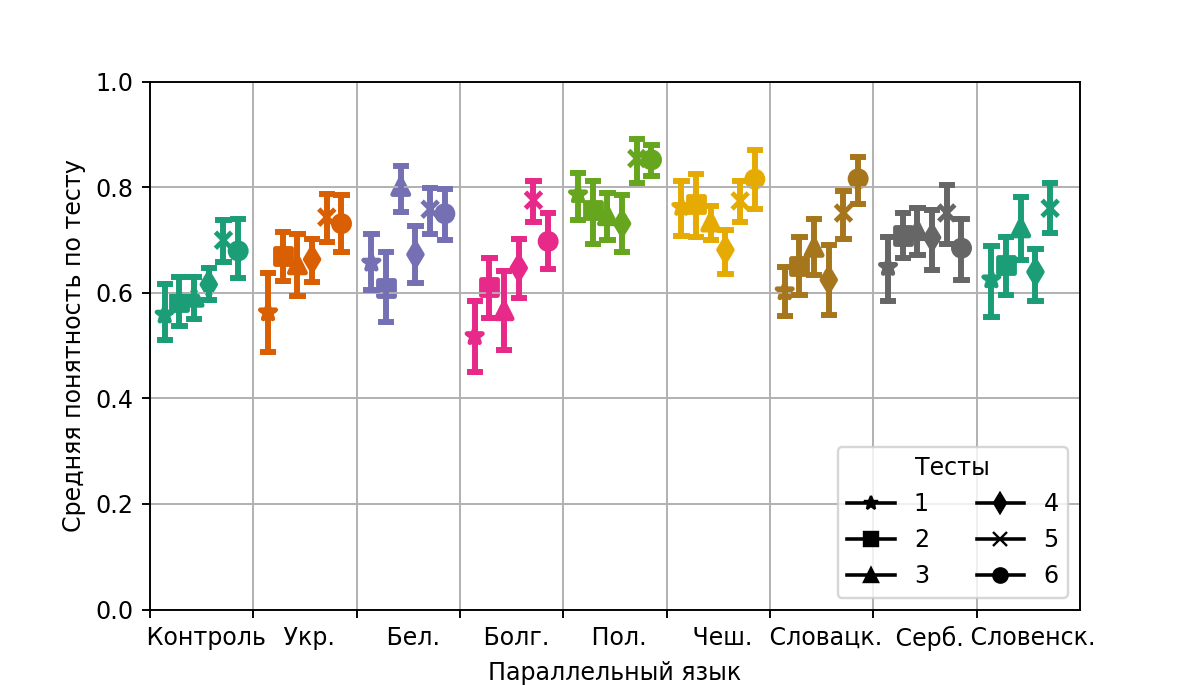

In [13]:
show_tests_by_langs(user_data, axes)

Из графиков видно, что тесты 5 и 6 являются самыми простыми — их средняя понятность на контрольном тесте составляет 0.7 и 0.68, соответственно. Если рассматривать результаты по языкам, то для украинского языка разница оказалась значимой на всех тестах; для белорусского — на всех, кроме четвертого; для болгарского — для половины тестов. Польский, чешский, словацкий и словенский показали значимый прирост лишь в одном тесте, сербский — в двух. При этом заметим, что на материале всех тестов польский, словенский и сербский показали статистически значимый прирост. Для чешского языка разница с контрольным тестом была отрицательной два раза (первый и третий тесты). Таким образом, можно утверждать, что в текстах на украинском, белорусском и болгарском языках всегда содержится подсказка для русскоязычного читателя, тогда как тексты на остальных языках необходимо рассматривать индивидуально. Также можно утверждать, что понятность конкретного текста на заданном языке зависит от некоторых параметров.

Посмотрим теперь на зависимость ответов пользователей от их уровня образования.

Строки таблицы обозначены также как и выше. Столбцы даются в следующем порядке:
- *sch* - школьники;
- *bak* - бакалавры;
- *mag* - магистранты;
- *asp* - аспиранты;
- *fin* - завершили обучение;
- *unk* - не указали информацию;
- *unk2* - участники третьего теста для русского языка (информация не собиралась).

Розовые точки означают контрольную группу.

Красным обозначены интервалы по всем пользователям, зеленым - по получившим или получающим то или иное образование, связанное с языком, синим - не получившие такого образования.

<IPython.core.display.Javascript object>


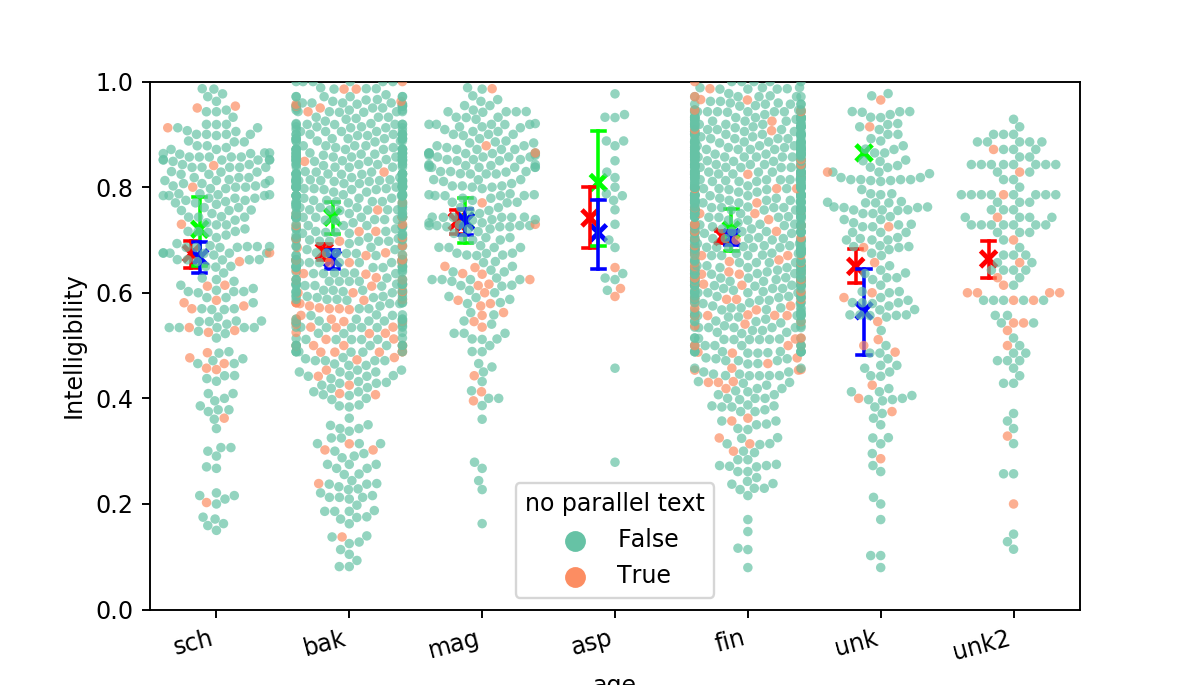

Output()

In [13]:
def showAgeStub(field, test):
    show_age(field, test, user_data, axes)

%matplotlib notebook

fig, axes = plt.subplots(1, 1, figsize=(7,4), num=2)

#lsel = Select(options=['Russian', 'Ukranian', 'Serbian', 'All'], value='Russian', description='Language: ')
fsel = Select(options=['age', 'spec'], value='age', description='Values: ')
esel = Select(options=['1', '2', '3', '4', '5', '6', 'All'], value='All', description='Test: ')
ui = HBox([fsel, esel])
out = interactive_output(showAgeStub, {'field': fsel, 'test': esel})
#out.layout.height = '200px'
display(ui, out)

Как видно из полученных данных, бакалавры менее аккуратно заполняют тест. "Хвост" с низкими значениями оценки частично объясняется тем, что ближе к середине теста часть студентов отправляла анкету, сотавив вторую половину незаполненной. Среди прочих участников такое поведение является более редким. Большинство участников третьего теста также были бакалаврами, их поведение является сходным. Результаты для школьников и аспирантов доверительно лучше.

Для русского языка можно построить следующую картину. При отсутствии параллельного текста результаты в среднем не изменяются. Однако при наличии такого текста, участники, имеющие отношение к лингвистике, дают доверительно лучшие ответы. Но если вид образования наложить на уровень образования, то становится понятным, что лингвистическое образование улучшает результаты только для школьников или бакалавров, а уже начиная с магистратуры результаты практически не отличаются. 

Мы также исследовали зависимость ответов от знания других славянских языков. Однако исследование не показало значительных отклонений от группы, не указавших знания других языков.

<IPython.core.display.Javascript object>


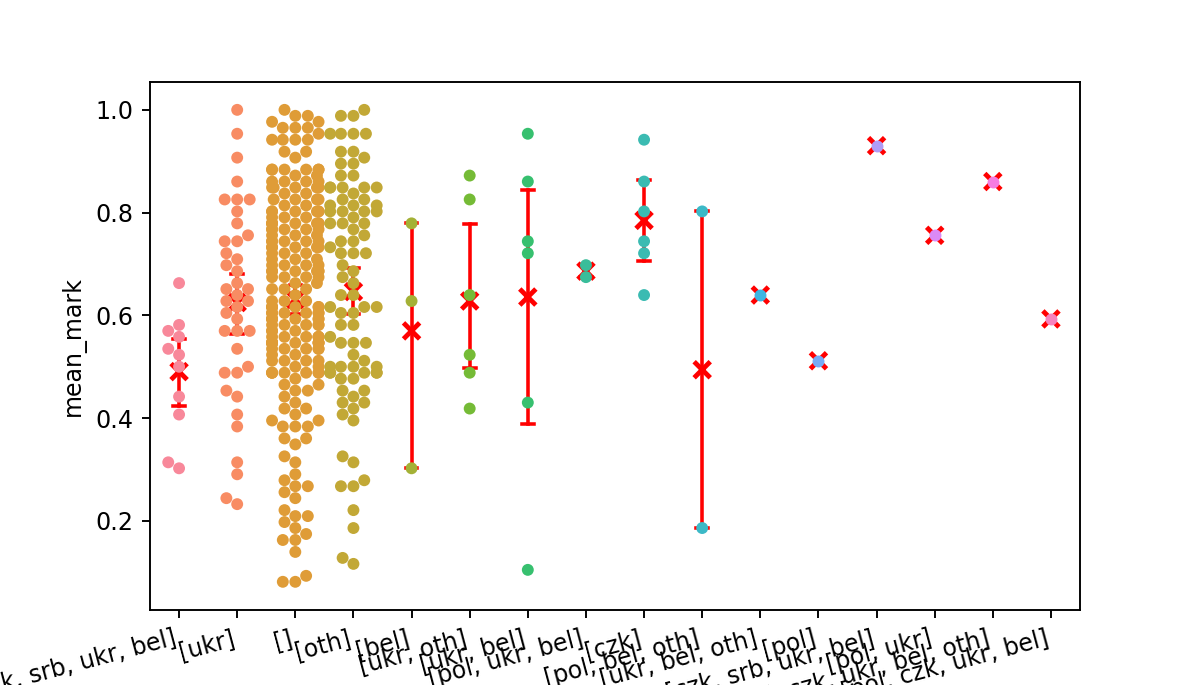

Output(layout=Layout(height='100px'))

In [14]:
def drawForeignStub(test_no):
    drawForeign(test_no, user_data, axes)

%matplotlib notebook

fig, axes = plt.subplots(1, 1, figsize=(7,4), num=2)

esel = Select(options=['1', '2', '3', '4', '5', '6', 'All'], value='1', description='Test: ')
ui = HBox([lsel, esel])
out = interactive_output(drawForeignStub, {'test_no': esel})
axes.set_xticklabels(axes.get_xticklabels(), rotation=15, ha='right')

out.layout.height = '100px'
display(ui, out)

Также была рассмотрена гипотеза зависимости понятности текста в зависимости от наличия в нем сходных слов. Известно, что многие слова разных славянских языков имеют общие корни. Наличие таких слов облегчает понимание текста.

Ниже привеена разметка слов текстов по сходству. Знаком 1 обозначены слова, имеющие общий корень. Знаком 2 обозначены слова, для которых в родном языке имеется слово со сходным смыслом и тем же корнем, что в параллельном тексте. Знаком 0 обозначены слова, не имеющие аналогов или какого-либо сходства в родном языке. Наконец, знаком ! обозначены "ложные друзья переводчика", например, "за его спиной" - "у яго за _плячыма_" (в русском языке "за плечами" имеет другое значение.

```Python
sim_rus1={#    0        10        20        30        40  
"Belorussian":"101!121122201111112110111121021111011011100",  
"Bulgarian"  :"200!!100201020111122201122012201!12112211!0",  
"Czech"      :"010!00020021010011222!01000202!2!2221!21000",  
"Polish"     :"021!01102022102111202201010002!000!01001002",  
"Serbian"    :"01000100!011210111220!11220100!1!122122100!",  
"Slovak"     :"220!00000022010101220!110002220210211020002",  
"Ukranian"   :"1211121020121111012110111221010111001210100",   
"Slovene"    :"002!012!!020000011021!01222002!2!020102112!",  
}

sim_rus2={#    0        10        20        30        40  
"Belorussian":"110211112110001110210202!0!!111121201020",  
"Bulgarian"  :"!10111200021!121100100010!1211120121!120",  
"Czech"      :"!!02010201002!21000100200!2001102121!0!0",  
"Polish"     :"10000001!120!02100010022!0101112!021!020",  
"Serbian"    :"!0011010!020012110!100020!10111!11210120",  
"Slovak"     :"!00201022100022100010000!!2011120121!120",  
"Ukranian"   :"21011110!110201110010102!0221111!1201220",     
"Slovene"    :"!201100000!0202102!1000222!2111!!021!1!0",  
}

sim_rus3={#    0        10        20        30
"Belorussian":"100220101222!122111!1!121!10!211121",  
"Bulgarian"  :"12100111!0002100112!1!101!11!111101",  
"Czech"      :"110220!002000!00!1!22!0!!!!2!1!102!",  
"Polish"     :"100222!01202!!00!12!2!12!!!2!1!1121",  
"Ukranian"   :"111022!012!2!!00!1211!12!!!2!1!1121",  
"Slovak"     :"111220!0220!0!!0!1!!2!22!2!2!!2111!",  
"Slovene"    :"102222!200020!!0!1122!12!1!2!!2110!",  
"Serbian"    :"11!0211!012001101100201!1!10!101122",  
}

sim_rus4={#    0        10        20        30        40  
"Ukranian"   :"110!1!1!21212!22!1!2!01!10001!21000!1001!00!",  
"Belorussian":"01!1212020212222!2!2!0121!001!2!!00210011000",  
"Polish"     :"20!12!202!022022!2!2!01010!01!20!00221121000",  
"Bulgarian"  :"02012212!1!2!121!!22111!211111010!020121110!",  
"Czech"      :"02!11!!20!200021!122201010!!0!01202022111220",  
"Slovak"     :"!2201!220!210021!2!02!1010!000012010121!1!!2",  
"Slovene"    :"22000!0002220021!2122202!2202220!0!210121110",  
"Serbian"    :"!20112000122221200222102!2121!02!00!0101100!",  
}

sim_rus5={#    0        10        20        30        40  
"Ukranian"   :"211101111021110111211110!10020102!010",  
"Belorussian":"011001010001100!1102111!!000201022!10",  
"Polish"     :"21100101100200201102111000!!101010010",  
"Bulgarian"  :"222!00!!10221!2!12!01111!2111221121!1",  
"Czech"      :"221!!0!110221!201002111!!000101111010",  
"Slovak"     :"22!!1!!112221!!111021110!000111010210",  
"Slovene"    :"2!20!20!!!2200!1!102111!02111!!010212",  
"Serbian"    :"2!2!!!!!00221!!011!!1110001112!000002",  
}

sim_rus6={#    0        10        20        30        40  
"Ukranian"   :"!1110211210012210001001111210111101",  
"Belorussian":"!11112110101111!0011010111120111101",  
"Polish"     :"!11122110100122!0022001121100122200",  
"Bulgarian"  :"111110011101111112!10!0111000121112",  
"Czech"      :"!11101200000100!00010!0!0!1!100001!",  
"Serbian"    :"11111201211!1!!1!!!10!01!102!211112",  
"Slovene"    :"!12120211100122!2202002221!22!22120",  
}
```

Код, размещенный ниже, позволяет посмотреть соответствия пропущенных слов между собой. Заметим, что в первом тексте в некоторых языках слова внутри нескольких предложений поменялись местами. В таблице ниже этот недостаток исправлен.

In [15]:
def showWordsStub(test_no: str):
    showWords(test_no, text_frame)

%matplotlib notebook

esel = Select(options=['1', '2', '3', '4', '5', '6'], value='1', description='Test: ')
ui = HBox([esel])
out = interactive_output(showWordsStub, {'test_no': esel})
display(ui, out)


Output()

Итак, построим график, показывающий зависимость понятности слова от его типа - однокоренное, есть однокоренной аналог, нет аналогов, ложный друг переводчика.

Каждая точка на графике слева означает слово в тесте с одним из параллельных языков, на графике справа - без параллельного теста (контроль). Доверитальные интервалы нарисованы тем же цветом, что и точки, цвета соответствуют типам слов и тестам. Красные доверительные интервалы на рисунке слева показывают соответствующие доверительные интервалы контроля (графика справа) и позволяют визуально оценить изменения в понимаемости при наличии параллельного текста.

<IPython.core.display.Javascript object>


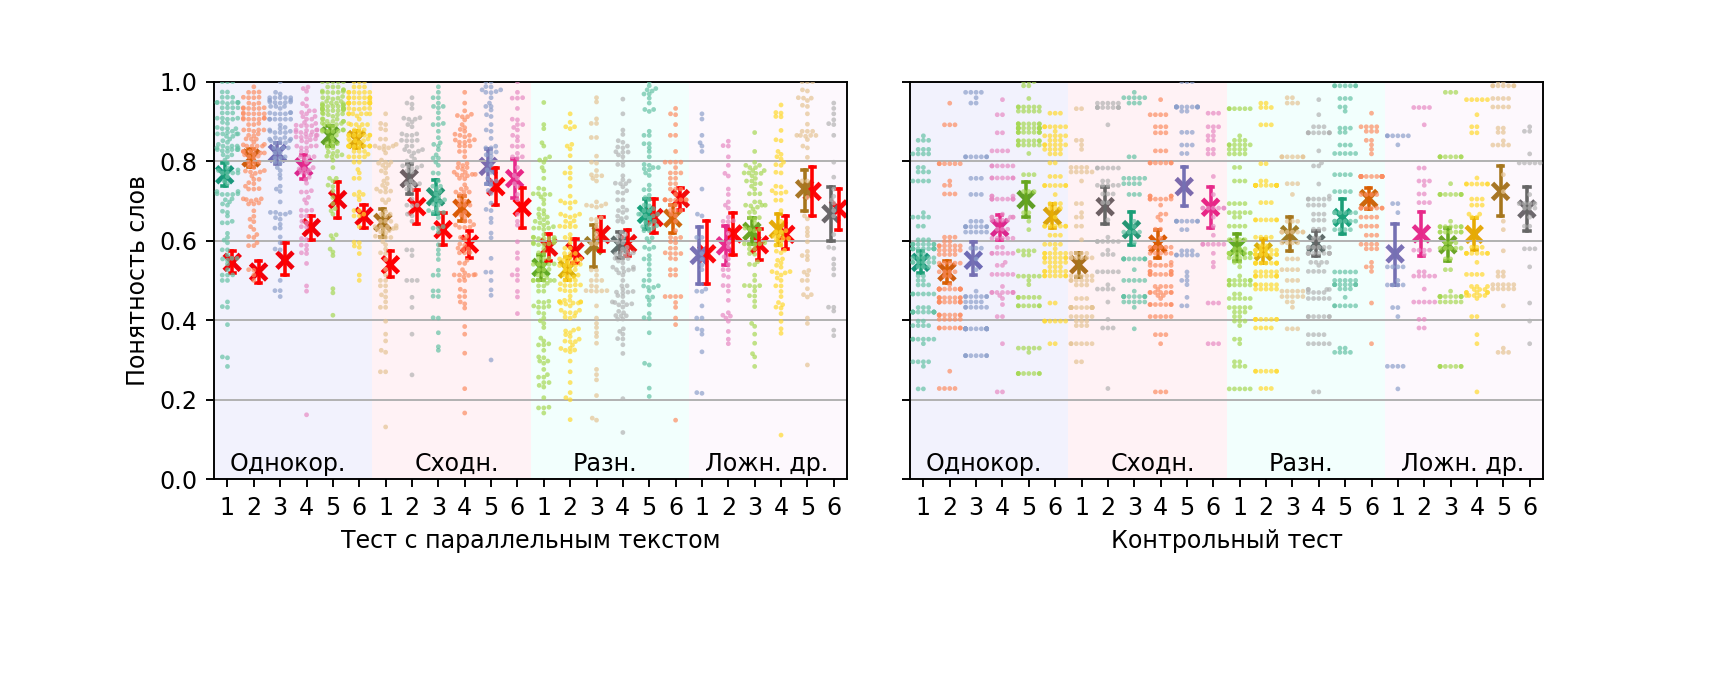

In [16]:
%matplotlib notebook

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(10,4), num=3)
showIntelligibility(qu_data, text_frame, axes, fig)

Из графиков видно, что в русском языке слова, однокоренные словам из параллельного текста, угадываются примерно в полтора раза лучше, чем при отсутствии подсказки. Для слов, имеющих сходные слова в языке параллельного текста, ситуация не столь однозначная. В первом тесте наблюдается доверительное улучшение, тогда как для второго и третьего текстов улучшение незначительно. Слова, не имеющие аналогов, и "ложные друзья переводчика" скорее мешают понимать текст.

Теперь посмотрим как ведут себя тесты в зависимости от процента сходных слов в параллельном тексте. 

In [17]:
all_resn, all_tests = processIntelligibility(qu_data, text_frame)
intellig = pd.DataFrame()
#mean1 = drawAnIntel(all_resn, intellig, "Russian", 'False Friends', 1, 43, axes, 'brief')
mean2 = drawAnIntel(user_data, all_resn, intellig, 'False Friends', 2, 40, None)
intellig

,cnt2,intel2
lang,,
Belorussian,0.075,0.768421
Bulgarian,0.100,0.708446
Czech,0.150,0.580312
Polish,0.125,0.669034
Serbian,0.125,0.577564
Slovak,0.100,0.650847
Slovene,0.200,0.653041
Ukranian,0.075,0.756419


Ниже показаны соотношение процента сходных слов и результатов прохождения теста. Тесты с разными параллельными текстами показаны разным цветом, однако номера тестов не обозначены. Соответствующую информацию можно найти в таблице. Красная линия по диагонали дана в качества базы и соответствует линии ((0,0), (1,1)). Горизонтальные линии показывают результаты прохождения теста без параллельного текста в качестве подсказки.


<IPython.core.display.Javascript object>


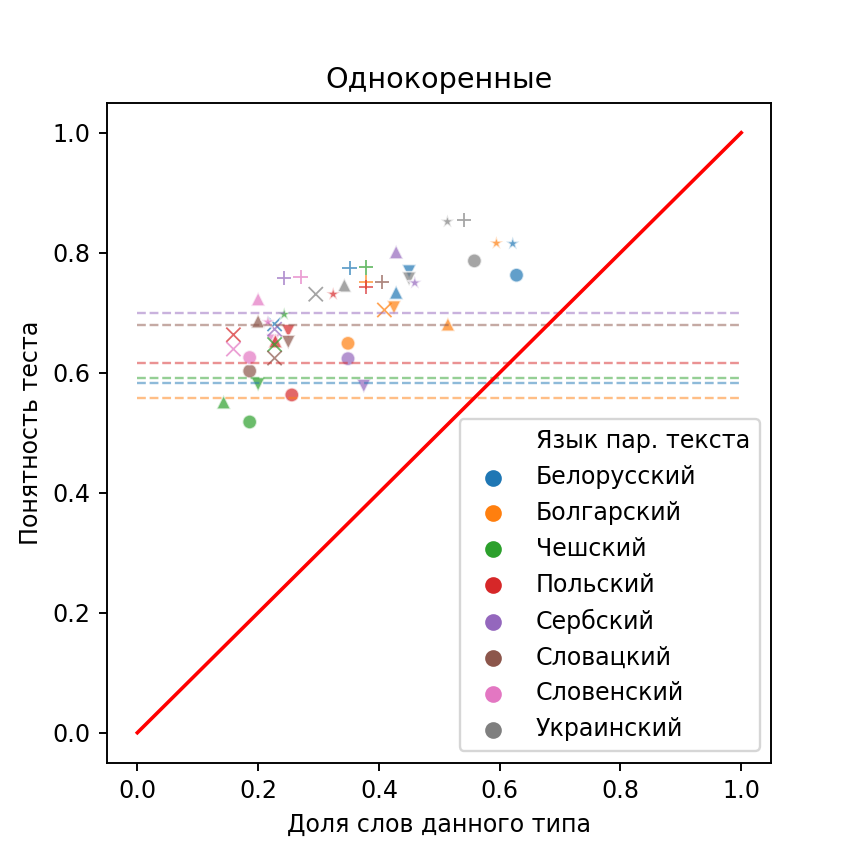

Select(options=('Same', 'Similar', 'Same and Similar', 'No analogues', 'False Friends'), value='Same')

Output()

In [18]:
def showIntelStub(sameness):
    showIntel(sameness, user_data, qu_data, text_frame, axes, fig)

%matplotlib notebook

fig, axes = plt.subplots(1, 1, figsize=(5, 5), num=4)

hsel = Select(options=['Same', 'Similar', 'Same and Similar', 'No analogues', 'False Friends'], value='Same')
out = interactive_output(showIntelStub, {'sameness':hsel})
display(hsel, out)


Ниже можно посмотреть изменение результатов для отдельных слов при наличии или отсутствии параллельного текста. Здесь можно выбрать номер теста, пороговое значение, должно ли значение быть меньше или превосходить пороговое значение, слова какого типа следует отображать.

Фильтрация производится по значениям, показанным на параллельных текстах.

In [19]:
def showWords2Stub(test_n, coef, word_type, thr):
    showWords2(test_n, coef, word_type, thr, qu_data, text_frame)

tsel = Select(options=['1', '2', '3', '4', '5', '6'], value='1', description='Test: ')
lsel = Select(options=['<', '>'], value='<', description="value")
trsel = FloatSlider(min=0, max=1, step=0.1, value=0.5, description="threshold")
ssel = Select(options=['Same', 'Similar', 'No analagues', 'False friend', 'All'], 
              value='Same', description="Words are")
ui = HBox([tsel, lsel, trsel, ssel])
out = interactive_output(showWords2Stub, {'test_n': tsel, 'coef':lsel, 'word_type': ssel, 'thr': trsel})
#out.layout.height = '320px'
display(ui, out)


Output()

### Выводы

- Наличие параллельного текста на незнакомом, но близком славянском языке помогает понять пропущенные слова в тексте. 
- Для русскоговорящих участников, польский и чешский языки только мешали проходить тест.
- Хорошо понимаются слова с общим или сходным корнем.
